# พื้นฐาน SQL สำหรับการวิเคราะห์ข้อมูล

## วัตถุประสงค์การเรียนรู้
- เข้าใจความสำคัญของ SQL ในการวิเคราะห์ข้อมูล
- เรียนรู้คำสั่ง SQL พื้นฐาน (SELECT, WHERE, GROUP BY)
- ฝึกเขียนคำสั่ง SQL ใน Jupyter Notebook
- สามารถเรียกดูและกรองข้อมูลจากฐานข้อมูลได้

## SQL คืออะไรและทำไมถึงสำคัญ?

SQL (Structured Query Language) เป็นภาษามาตรฐานสำหรับจัดการฐานข้อมูลเชิงสัมพันธ์ (Relational Database) ซึ่งเป็นที่นิยมในการจัดเก็บข้อมูลขององค์กรต่างๆ

### ทำไม SQL ถึงสำคัญสำหรับ Data Science?
- **ข้อมูลส่วนใหญ่อยู่ในฐานข้อมูล**: องค์กรส่วนใหญ่เก็บข้อมูลไว้ในฐานข้อมูล SQL
- **ประสิทธิภาพสูง**: SQL ออกแบบมาเพื่อจัดการข้อมูลขนาดใหญ่อย่างมีประสิทธิภาพ
- **Data Transformation**: ช่วยในการกรอง แปลง และรวมข้อมูลก่อนนำไปวิเคราะห์
- **ทักษะที่เป็นที่ต้องการ**: นักวิเคราะห์ข้อมูลที่รู้ SQL มีความต้องการสูงในตลาดงาน

### โครงสร้างฐานข้อมูล:
![โครงสร้างฐานข้อมูล](https://raw.githubusercontent.com/amornpan/NT-Data-Science-and-Data-Analytics/refs/heads/master/img/er.png)

### รายละเอียดตาราง:

1. **products** - สินค้า
   - product_id (PRIMARY KEY): รหัสสินค้า
   - product_name: ชื่อสินค้า
   - category: หมวดหมู่
   - price: ราคา
   - stock: จำนวนคงเหลือ

2. **customers** - ลูกค้า
   - customer_id (PRIMARY KEY): รหัสลูกค้า
   - first_name: ชื่อ
   - last_name: นามสกุล
   - email: อีเมล
   - phone: เบอร์โทรศัพท์

3. **orders** - คำสั่งซื้อ
   - order_id (PRIMARY KEY): รหัสคำสั่งซื้อ
   - customer_id (FOREIGN KEY): รหัสลูกค้า (อ้างอิงถึงตาราง customers)
   - order_date: วันที่สั่งซื้อ
   - total_amount: จำนวนเงินรวม

4. **order_items** - รายการสินค้าในคำสั่งซื้อ
   - order_item_id (PRIMARY KEY): รหัสรายการ
   - order_id (FOREIGN KEY): รหัสคำสั่งซื้อ (อ้างอิงถึงตาราง orders)
   - product_id (FOREIGN KEY): รหัสสินค้า (อ้างอิงถึงตาราง products)
   - quantity: จำนวนสินค้า
   - price: ราคาต่อชิ้น

### ความสัมพันธ์ระหว่างตาราง:
- ลูกค้า 1 คน สามารถมีหลายคำสั่งซื้อได้ (1-to-many relationship ระหว่าง customers และ orders)
- คำสั่งซื้อ 1 รายการ สามารถมีหลายสินค้าได้ (1-to-many relationship ระหว่าง orders และ order_items)
- สินค้า 1 ชิ้น สามารถอยู่ในหลายคำสั่งซื้อได้ (many-to-many relationship ระหว่าง products และ orders ผ่านทาง order_items)

## การใช้ SQLite ใน Jupyter Notebook

SQLite เป็นระบบฐานข้อมูลขนาดเล็กที่ไม่ต้องติดตั้งเซิร์ฟเวอร์แยกต่างหาก สามารถทำงานได้ในไฟล์เดียว เราจะใช้ SQLite ในการเรียนรู้ SQL พื้นฐานใน Jupyter Notebook

### การติดตั้ง SQLite

SQLite มีอยู่แล้วใน Python ไม่จำเป็นต้องติดตั้งเพิ่มเติม

เริ่มต้นด้วยการโหลดไลบรารี `sqlite3` ซึ่งมาพร้อมกับ Python และ `pandas` สำหรับแสดงผลลัพธ์แบบตาราง:

In [1]:
import sqlite3
import pandas as pd

## การสร้างฐานข้อมูลตัวอย่าง

เราจะสร้างฐานข้อมูลตัวอย่างสำหรับร้านค้าเพื่อใช้ในการฝึกเขียน SQL:

In [2]:
# สร้างการเชื่อมต่อกับฐานข้อมูล SQLite ในหน่วยความจำ
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# สร้างตาราง products (สินค้า)
cursor.execute('''
CREATE TABLE products (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT NOT NULL,
    category TEXT NOT NULL,
    price REAL NOT NULL,
    stock INTEGER NOT NULL
)
''')

# สร้างตาราง customers (ลูกค้า)
cursor.execute('''
CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL,
    phone TEXT
)
''')

# สร้างตาราง orders (คำสั่งซื้อ)
cursor.execute('''
CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    total_amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
)
''')

# สร้างตาราง order_items (รายการสินค้าในคำสั่งซื้อ)
cursor.execute('''
CREATE TABLE order_items (
    order_item_id INTEGER PRIMARY KEY,
    order_id INTEGER NOT NULL,
    product_id INTEGER NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    FOREIGN KEY (order_id) REFERENCES orders (order_id),
    FOREIGN KEY (product_id) REFERENCES products (product_id)
)
''')

# เพิ่มข้อมูลตัวอย่างลงในตาราง products
products_data = [
    (1, 'iPhone 13', 'Electronics', 35000, 20),
    (2, 'Samsung Galaxy S21', 'Electronics', 28000, 15),
    (3, 'MacBook Pro', 'Electronics', 59000, 10),
    (4, 'Nike Air Max', 'Footwear', 4500, 30),
    (5, 'Adidas Ultraboost', 'Footwear', 5200, 25),
    (6, 'Levi\'s 501 Jeans', 'Clothing', 2800, 40),
    (7, 'H&M T-Shirt', 'Clothing', 590, 100),
    (8, 'Sony WH-1000XM4', 'Electronics', 12000, 15),
    (9, 'Kindle Paperwhite', 'Electronics', 4500, 20),
    (10, 'Uniqlo Shirt', 'Clothing', 990, 80)
]

cursor.executemany('INSERT INTO products VALUES (?, ?, ?, ?, ?)', products_data)

# เพิ่มข้อมูลตัวอย่างลงในตาราง customers
customers_data = [
    (1, 'John', 'Doe', 'john.doe@email.com', '081-111-1111'),
    (2, 'Jane', 'Smith', 'jane.smith@email.com', '082-222-2222'),
    (3, 'Robert', 'Johnson', 'robert.j@email.com', '083-333-3333'),
    (4, 'Emily', 'Williams', 'emily.w@email.com', '084-444-4444'),
    (5, 'Michael', 'Brown', 'michael.b@email.com', '085-555-5555')
]

cursor.executemany('INSERT INTO customers VALUES (?, ?, ?, ?, ?)', customers_data)

# เพิ่มข้อมูลตัวอย่างลงในตาราง orders
orders_data = [
    (1, 1, '2023-01-10', 35000),
    (2, 2, '2023-01-15', 59000),
    (3, 3, '2023-01-20', 9700),
    (4, 4, '2023-01-25', 28000),
    (5, 5, '2023-01-30', 5200),
    (6, 1, '2023-02-05', 12000),
    (7, 2, '2023-02-10', 3390),
    (8, 3, '2023-02-15', 4500)
]

cursor.executemany('INSERT INTO orders VALUES (?, ?, ?, ?)', orders_data)

# เพิ่มข้อมูลตัวอย่างลงในตาราง order_items
order_items_data = [
    (1, 1, 1, 1, 35000),  # John bought iPhone 13
    (2, 2, 3, 1, 59000),  # Jane bought MacBook Pro
    (3, 3, 4, 1, 4500),   # Robert bought Nike Air Max
    (4, 3, 7, 2, 590),    # Robert bought 2 H&M T-Shirts
    (5, 4, 2, 1, 28000),  # Emily bought Samsung Galaxy S21
    (6, 5, 5, 1, 5200),   # Michael bought Adidas Ultraboost
    (7, 6, 8, 1, 12000),  # John bought Sony WH-1000XM4
    (8, 7, 6, 1, 2800),   # Jane bought Levi's 501 Jeans
    (9, 7, 10, 1, 990),   # Jane bought Uniqlo Shirt
    (10, 8, 9, 1, 4500)   # Robert bought Kindle Paperwhite
]

cursor.executemany('INSERT INTO order_items VALUES (?, ?, ?, ?, ?)', order_items_data)

# บันทึกการเปลี่ยนแปลงลงในฐานข้อมูล
conn.commit()

print("สร้างฐานข้อมูลตัวอย่างเรียบร้อยแล้ว")

สร้างฐานข้อมูลตัวอย่างเรียบร้อยแล้ว


## การเรียกดูข้อมูลด้วย SELECT

คำสั่ง SELECT ใช้ในการเรียกดูข้อมูลจากตาราง

### รูปแบบพื้นฐานของคำสั่ง SELECT:

```sql
SELECT column1, column2, ...
FROM table_name;
```

การใช้ * จะเลือกทุกคอลัมน์ในตาราง:

In [3]:
# เลือกทุกคอลัมน์จากตาราง products
query = "SELECT * FROM products"
products_df = pd.read_sql_query(query, conn)
products_df

,product_id,product_name,category,price,stock
0,1,iPhone 13,Electronics,35000.0,20
1,2,Samsung Galaxy S21,Electronics,28000.0,15
2,3,MacBook Pro,Electronics,59000.0,10
3,4,Nike Air Max,Footwear,4500.0,30
4,5,Adidas Ultraboost,Footwear,5200.0,25
5,6,Levi's 501 Jeans,Clothing,2800.0,40
6,7,H&M T-Shirt,Clothing,590.0,100
7,8,Sony WH-1000XM4,Electronics,12000.0,15
8,9,Kindle Paperwhite,Electronics,4500.0,20
9,10,Uniqlo Shirt,Clothing,990.0,80


In [4]:
# เลือกเฉพาะบางคอลัมน์จากตาราง products
query = "SELECT product_name, category, price FROM products"
products_df = pd.read_sql_query(query, conn)
products_df

,product_name,category,price
0,iPhone 13,Electronics,35000.0
1,Samsung Galaxy S21,Electronics,28000.0
2,MacBook Pro,Electronics,59000.0
3,Nike Air Max,Footwear,4500.0
4,Adidas Ultraboost,Footwear,5200.0
5,Levi's 501 Jeans,Clothing,2800.0
6,H&M T-Shirt,Clothing,590.0
7,Sony WH-1000XM4,Electronics,12000.0
8,Kindle Paperwhite,Electronics,4500.0
9,Uniqlo Shirt,Clothing,990.0


### การสร้างคอลัมน์ใหม่และการตั้งชื่อคอลัมน์ด้วย AS

SQL สามารถสร้างคอลัมน์ใหม่จากการคำนวณและตั้งชื่อด้วย AS:

In [5]:
# สร้างคอลัมน์ total_value (price * stock) และตั้งชื่อด้วย AS
query = """
SELECT 
    product_name, 
    price, 
    stock, 
    price * stock AS total_value
FROM products
ORDER BY total_value DESC
"""
products_value_df = pd.read_sql_query(query, conn)
products_value_df

,product_name,price,stock,total_value
0,iPhone 13,35000.0,20,700000.0
1,MacBook Pro,59000.0,10,590000.0
2,Samsung Galaxy S21,28000.0,15,420000.0
3,Sony WH-1000XM4,12000.0,15,180000.0
4,Nike Air Max,4500.0,30,135000.0
5,Adidas Ultraboost,5200.0,25,130000.0
6,Levi's 501 Jeans,2800.0,40,112000.0
7,Kindle Paperwhite,4500.0,20,90000.0
8,Uniqlo Shirt,990.0,80,79200.0
9,H&M T-Shirt,590.0,100,59000.0


## การกรองข้อมูลด้วย WHERE

เราสามารถใช้ WHERE เพื่อกรองข้อมูลตามเงื่อนไขที่ต้องการ

### รูปแบบพื้นฐานของการใช้ WHERE:

```sql
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

In [6]:
# เลือกสินค้าในหมวดหมู่ Electronics
query = "SELECT * FROM products WHERE category = 'Electronics'"
electronics_df = pd.read_sql_query(query, conn)
electronics_df

,product_id,product_name,category,price,stock
0,1,iPhone 13,Electronics,35000.0,20
1,2,Samsung Galaxy S21,Electronics,28000.0,15
2,3,MacBook Pro,Electronics,59000.0,10
3,8,Sony WH-1000XM4,Electronics,12000.0,15
4,9,Kindle Paperwhite,Electronics,4500.0,20


In [7]:
# เลือกสินค้าที่มีราคามากกว่า 10,000 บาท
query = "SELECT product_name, price FROM products WHERE price > 10000"
expensive_products_df = pd.read_sql_query(query, conn)
expensive_products_df

,product_name,price
0,iPhone 13,35000.0
1,Samsung Galaxy S21,28000.0
2,MacBook Pro,59000.0
3,Sony WH-1000XM4,12000.0


### การใช้ตัวดำเนินการเปรียบเทียบใน WHERE

- `=` เท่ากับ
- `>` มากกว่า
- `<` น้อยกว่า
- `>=` มากกว่าหรือเท่ากับ
- `<=` น้อยกว่าหรือเท่ากับ
- `<>` หรือ `!=` ไม่เท่ากับ

In [8]:
# ตัวอย่างการใช้ตัวดำเนินการเปรียบเทียบ
query = "SELECT product_name, price FROM products WHERE price >= 4500 AND price <= 12000"
mid_range_products_df = pd.read_sql_query(query, conn)
mid_range_products_df

,product_name,price
0,Nike Air Max,4500.0
1,Adidas Ultraboost,5200.0
2,Sony WH-1000XM4,12000.0
3,Kindle Paperwhite,4500.0


### การใช้ตัวดำเนินการทางตรรกะใน WHERE

- `AND` - ทั้งสองเงื่อนไขต้องเป็นจริง
- `OR` - อย่างน้อยหนึ่งเงื่อนไขต้องเป็นจริง
- `NOT` - กลับค่าเงื่อนไข

In [9]:
# ตัวอย่างการใช้ AND
query = "SELECT * FROM products WHERE category = 'Electronics' AND price < 10000"
affordable_electronics_df = pd.read_sql_query(query, conn)
affordable_electronics_df

,product_id,product_name,category,price,stock
0,9,Kindle Paperwhite,Electronics,4500.0,20


In [10]:
# ตัวอย่างการใช้ OR
query = "SELECT * FROM products WHERE category = 'Clothing' OR category = 'Footwear'"
fashion_products_df = pd.read_sql_query(query, conn)
fashion_products_df

,product_id,product_name,category,price,stock
0,4,Nike Air Max,Footwear,4500.0,30
1,5,Adidas Ultraboost,Footwear,5200.0,25
2,6,Levi's 501 Jeans,Clothing,2800.0,40
3,7,H&M T-Shirt,Clothing,590.0,100
4,10,Uniqlo Shirt,Clothing,990.0,80


### การใช้ LIKE ในการค้นหาข้อความ

เราสามารถใช้ LIKE เพื่อค้นหาข้อความที่มีรูปแบบเฉพาะ

- `%` แทนอักขระใดๆ จำนวนเท่าใดก็ได้ (รวมถึง 0 ตัว)
- `_` แทนอักขระใดๆ 1 ตัว

In [11]:
# ตัวอย่างการใช้ LIKE
query = "SELECT * FROM products WHERE product_name LIKE '%shirt%'"
shirt_products_df = pd.read_sql_query(query, conn)
shirt_products_df

,product_id,product_name,category,price,stock
0,7,H&M T-Shirt,Clothing,590.0,100
1,10,Uniqlo Shirt,Clothing,990.0,80


## การเรียงลำดับข้อมูลด้วย ORDER BY

เราสามารถใช้ ORDER BY เพื่อเรียงลำดับผลลัพธ์

### รูปแบบพื้นฐานของการใช้ ORDER BY:

```sql
SELECT column1, column2, ...
FROM table_name
ORDER BY column1 [ASC|DESC], column2 [ASC|DESC], ...;
```

- `ASC` - เรียงจากน้อยไปมาก (ค่าเริ่มต้น)
- `DESC` - เรียงจากมากไปน้อย

In [12]:
# เรียงสินค้าตามราคาจากมากไปน้อย
query = "SELECT product_name, category, price FROM products ORDER BY price DESC"
products_by_price_df = pd.read_sql_query(query, conn)
products_by_price_df

,product_name,category,price
0,MacBook Pro,Electronics,59000.0
1,iPhone 13,Electronics,35000.0
2,Samsung Galaxy S21,Electronics,28000.0
3,Sony WH-1000XM4,Electronics,12000.0
4,Adidas Ultraboost,Footwear,5200.0
5,Nike Air Max,Footwear,4500.0
6,Kindle Paperwhite,Electronics,4500.0
7,Levi's 501 Jeans,Clothing,2800.0
8,Uniqlo Shirt,Clothing,990.0
9,H&M T-Shirt,Clothing,590.0


In [13]:
# เรียงสินค้าตามหมวดหมู่ และในแต่ละหมวดหมู่เรียงตามราคาจากน้อยไปมาก
query = "SELECT product_name, category, price FROM products ORDER BY category ASC, price ASC"
products_by_category_price_df = pd.read_sql_query(query, conn)
products_by_category_price_df

,product_name,category,price
0,H&M T-Shirt,Clothing,590.0
1,Uniqlo Shirt,Clothing,990.0
2,Levi's 501 Jeans,Clothing,2800.0
3,Kindle Paperwhite,Electronics,4500.0
4,Sony WH-1000XM4,Electronics,12000.0
5,Samsung Galaxy S21,Electronics,28000.0
6,iPhone 13,Electronics,35000.0
7,MacBook Pro,Electronics,59000.0
8,Nike Air Max,Footwear,4500.0
9,Adidas Ultraboost,Footwear,5200.0


## การจัดกลุ่มข้อมูลด้วย GROUP BY

GROUP BY ใช้ในการจัดกลุ่มข้อมูลและคำนวณค่าสรุป (เช่น SUM, AVG, COUNT) สำหรับแต่ละกลุ่ม

### รูปแบบพื้นฐานของการใช้ GROUP BY:

```sql
SELECT column1, aggregate_function(column2)
FROM table_name
GROUP BY column1;
```

### ฟังก์ชันรวม (Aggregate Functions) ที่ใช้บ่อย:

- `COUNT()` - นับจำนวนแถว
- `SUM()` - รวมค่าในคอลัมน์
- `AVG()` - คำนวณค่าเฉลี่ย
- `MAX()` - หาค่าสูงสุด
- `MIN()` - หาค่าต่ำสุด

In [14]:
# นับจำนวนสินค้าในแต่ละหมวดหมู่
query = "SELECT category, COUNT(*) as product_count FROM products GROUP BY category"
category_counts_df = pd.read_sql_query(query, conn)
category_counts_df

,category,product_count
0,Clothing,3
1,Electronics,5
2,Footwear,2


In [15]:
# หาราคาเฉลี่ย ราคาต่ำสุด และราคาสูงสุดของสินค้าในแต่ละหมวดหมู่
query = """
SELECT 
    category, 
    AVG(price) as avg_price, 
    MIN(price) as min_price, 
    MAX(price) as max_price
FROM products 
GROUP BY category
"""
category_stats_df = pd.read_sql_query(query, conn)
category_stats_df

,category,avg_price,min_price,max_price
0,Clothing,1460.0,590.0,2800.0
1,Electronics,27700.0,4500.0,59000.0
2,Footwear,4850.0,4500.0,5200.0


### การใช้ HAVING เพื่อกรองผลลัพธ์หลังการจัดกลุ่ม

HAVING ใช้กรองผลลัพธ์หลังจากการจัดกลุ่มด้วย GROUP BY คล้ายกับ WHERE แต่ใช้กับผลลัพธ์ของการจัดกลุ่ม:

In [16]:
# หาหมวดหมู่สินค้าที่มีราคาเฉลี่ยมากกว่า 10,000 บาท
query = """
SELECT 
    category, 
    AVG(price) as avg_price
FROM products 
GROUP BY category
HAVING AVG(price) > 10000
"""
expensive_categories_df = pd.read_sql_query(query, conn)
expensive_categories_df

,category,avg_price
0,Electronics,27700.0


## การวิเคราะห์ข้อมูลการขายด้วย SQL

เราสามารถใช้ SQL เพื่อวิเคราะห์ข้อมูลการขายจากหลายตาราง:

In [17]:
# วิเคราะห์ยอดขายรวมของแต่ละหมวดหมู่สินค้า
query = """
SELECT 
    p.category, 
    SUM(oi.price * oi.quantity) as total_sales
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC
"""
category_sales_df = pd.read_sql_query(query, conn)
category_sales_df

,category,total_sales
0,Electronics,138500.0
1,Footwear,9700.0
2,Clothing,4970.0


In [18]:
# หาลูกค้าที่มียอดซื้อสูงสุด 3 อันดับแรก
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name as customer_name,
    SUM(o.total_amount) as total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
ORDER BY total_spent DESC
LIMIT 3
"""
top_customers_df = pd.read_sql_query(query, conn)
top_customers_df

,customer_id,customer_name,total_spent
0,2,Jane Smith,62390.0
1,1,John Doe,47000.0
2,4,Emily Williams,28000.0


In [19]:
# หาสินค้าที่ขายดีที่สุด (จำนวนชิ้น)
query = """
SELECT 
    p.product_id,
    p.product_name,
    SUM(oi.quantity) as total_quantity_sold
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_id
ORDER BY total_quantity_sold DESC
"""
top_selling_products_df = pd.read_sql_query(query, conn)
top_selling_products_df

,product_id,product_name,total_quantity_sold
0,7,H&M T-Shirt,2
1,10,Uniqlo Shirt,1
2,9,Kindle Paperwhite,1
3,8,Sony WH-1000XM4,1
4,6,Levi's 501 Jeans,1
5,5,Adidas Ultraboost,1
6,4,Nike Air Max,1
7,3,MacBook Pro,1
8,2,Samsung Galaxy S21,1
9,1,iPhone 13,1


## การเชื่อมตารางด้วย JOIN

JOIN ใช้ในการรวมข้อมูลจากหลายตารางเข้าด้วยกัน ซึ่งมักจะใช้ในการวิเคราะห์ข้อมูลที่มีความสัมพันธ์กัน

### ประเภทของ JOIN ที่ใช้บ่อย:

- `INNER JOIN` - เลือกแถวที่มีค่าตรงกันในทั้งสองตาราง
- `LEFT JOIN` - เลือกทุกแถวจากตารางด้านซ้าย และแถวที่ตรงกันจากตารางด้านขวา
- `RIGHT JOIN` - เลือกทุกแถวจากตารางด้านขวา และแถวที่ตรงกันจากตารางด้านซ้าย
- `FULL JOIN` - เลือกทุกแถวที่ตรงกันจากทั้งสองตาราง

In [20]:
# ตัวอย่างการใช้ INNER JOIN เพื่อดูรายละเอียดคำสั่งซื้อพร้อมชื่อลูกค้า
query = """
SELECT 
    o.order_id,
    o.order_date,
    c.first_name || ' ' || c.last_name as customer_name,
    o.total_amount
FROM orders o
INNER JOIN customers c ON o.customer_id = c.customer_id
ORDER BY o.order_date
"""
orders_with_customers_df = pd.read_sql_query(query, conn)
orders_with_customers_df

,order_id,order_date,customer_name,total_amount
0,1,2023-01-10,John Doe,35000.0
1,2,2023-01-15,Jane Smith,59000.0
2,3,2023-01-20,Robert Johnson,9700.0
3,4,2023-01-25,Emily Williams,28000.0
4,5,2023-01-30,Michael Brown,5200.0
5,6,2023-02-05,John Doe,12000.0
6,7,2023-02-10,Jane Smith,3390.0
7,8,2023-02-15,Robert Johnson,4500.0


In [21]:
# ตัวอย่างการใช้หลาย JOIN เพื่อดูรายละเอียดสินค้าที่ลูกค้าแต่ละคนซื้อ
query = """
SELECT 
    c.first_name || ' ' || c.last_name as customer_name,
    o.order_id,
    o.order_date,
    p.product_name,
    oi.quantity,
    oi.price,
    (oi.quantity * oi.price) as subtotal
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
ORDER BY c.last_name, o.order_date
"""
customer_purchases_df = pd.read_sql_query(query, conn)
customer_purchases_df

,customer_name,order_id,order_date,product_name,quantity,price,subtotal
0,Michael Brown,5,2023-01-30,Adidas Ultraboost,1,5200.0,5200.0
1,John Doe,1,2023-01-10,iPhone 13,1,35000.0,35000.0
2,John Doe,6,2023-02-05,Sony WH-1000XM4,1,12000.0,12000.0
3,Robert Johnson,3,2023-01-20,Nike Air Max,1,4500.0,4500.0
4,Robert Johnson,3,2023-01-20,H&M T-Shirt,2,590.0,1180.0
5,Robert Johnson,8,2023-02-15,Kindle Paperwhite,1,4500.0,4500.0
6,Jane Smith,2,2023-01-15,MacBook Pro,1,59000.0,59000.0
7,Jane Smith,7,2023-02-10,Levi's 501 Jeans,1,2800.0,2800.0
8,Jane Smith,7,2023-02-10,Uniqlo Shirt,1,990.0,990.0
9,Emily Williams,4,2023-01-25,Samsung Galaxy S21,1,28000.0,28000.0


## กิจกรรมฝึกปฏิบัติ

### กิจกรรม 1: สร้างรายงานยอดขายรายเดือน

เขียนคำสั่ง SQL เพื่อสร้างรายงานยอดขายรวมแยกตามเดือน:

In [22]:
# รายงานยอดขายรายเดือน
query = """
SELECT 
    strftime('%Y-%m', order_date) as month,
    SUM(total_amount) as monthly_sales
FROM orders
GROUP BY month
ORDER BY month
"""
monthly_sales_df = pd.read_sql_query(query, conn)
monthly_sales_df

,month,monthly_sales
0,2023-01,136900.0
1,2023-02,19890.0


### กิจกรรม 2: สร้างรายงานวิเคราะห์ลูกค้า

เขียนคำสั่ง SQL เพื่อวิเคราะห์พฤติกรรมการซื้อของลูกค้า:

In [23]:
# รายงานวิเคราะห์ลูกค้า
query = """
SELECT 
    c.customer_id,
    c.first_name || ' ' || c.last_name as customer_name,
    COUNT(DISTINCT o.order_id) as total_orders,
    SUM(o.total_amount) as total_spent,
    AVG(o.total_amount) as avg_order_value,
    MAX(o.order_date) as last_order_date,
    GROUP_CONCAT(DISTINCT p.category) as purchased_categories
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
LEFT JOIN products p ON oi.product_id = p.product_id
GROUP BY c.customer_id
ORDER BY total_spent DESC
"""
customer_analysis_df = pd.read_sql_query(query, conn)
customer_analysis_df

,customer_id,customer_name,total_orders,total_spent,avg_order_value,last_order_date,purchased_categories
0,2,Jane Smith,2,65780.0,21926.666667,2023-02-10,"Electronics,Clothing"
1,1,John Doe,2,47000.0,23500.000000,2023-02-05,Electronics
2,4,Emily Williams,1,28000.0,28000.000000,2023-01-25,Electronics
3,3,Robert Johnson,2,23900.0,7966.666667,2023-02-15,"Footwear,Clothing,Electronics"
4,5,Michael Brown,1,5200.0,5200.000000,2023-01-30,Footwear


## การผสมผสาน SQL กับ Python

เราสามารถใช้ Pandas ร่วมกับ SQL เพื่อวิเคราะห์ข้อมูลขั้นสูงได้:

C:\Users\Asus\AppData\Local\Temp\ipykernel_50428\1467340645.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = orders_df.set_index('order_date').resample('M')['total_amount'].sum().reset_index()


แนวโน้มยอดขายรายเดือน:
  order_date  total_amount
0 2023-01-31      136900.0
1 2023-02-28       19890.0


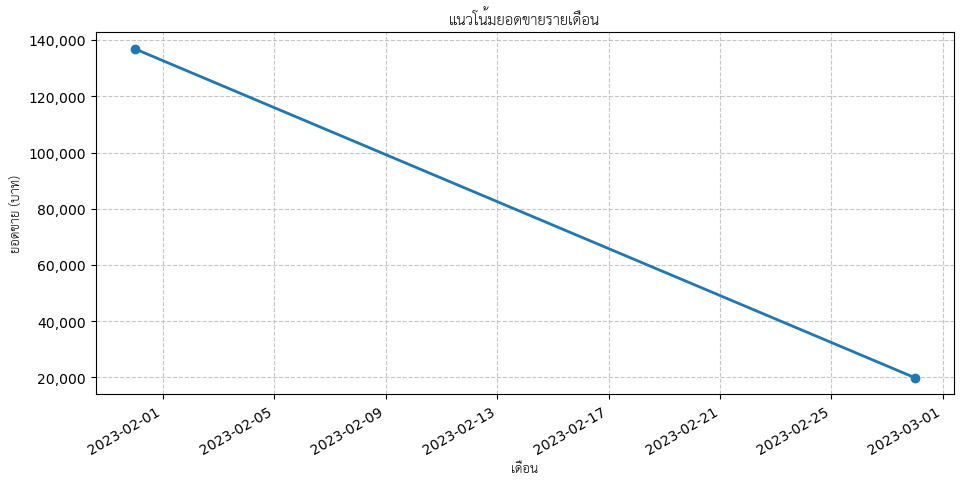

In [ ]:
# ใช้ SQL เพื่อดึงข้อมูลและ Python เพื่อวิเคราะห์เพิ่มเติม
query = "SELECT * FROM orders"
orders_df = pd.read_sql_query(query, conn)

# แปลงคอลัมน์วันที่เป็น datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# วิเคราะห์แนวโน้มตามเวลา
monthly_trend = orders_df.set_index('order_date').resample('M')['total_amount'].sum().reset_index()
print("แนวโน้มยอดขายรายเดือน:")
print(monthly_trend)

# สร้างกราฟแสดงแนวโน้มพร้อมกำหนดฟอนต์ภาษาไทย
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# กำหนดฟอนต์ที่รองรับภาษาไทย (เลือกหนึ่งในฟอนต์ต่อไปนี้ที่มีในระบบของคุณ)
# ตัวเลือกฟอนต์ภาษาไทย: 'TH Sarabun New', 'Angsana New', 'Tahoma', 'Arial Unicode MS'
thai_font = FontProperties(family='TH Sarabun New', size=14)

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend['order_date'], monthly_trend['total_amount'], marker='o', linewidth=2, color='#1f77b4')

# กำหนดฟอนต์ภาษาไทยสำหรับหัวเรื่องและป้ายชื่อแกน
plt.title('Monthly sales trends', fontproperties=thai_font, fontsize=16)
plt.xlabel('Month', fontproperties=thai_font)
plt.ylabel('Sales (Baht)', fontproperties=thai_font)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# จัดรูปแบบแกน y ให้แสดงจำนวนเงินเป็นหลักพัน
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# ปรับรูปแบบวันที่บนแกน x ให้อ่านง่าย
plt.gcf().autofmt_xdate()

plt.show()

## สรุป

- SQL เป็นภาษาสำหรับจัดการและสืบค้นข้อมูลในฐานข้อมูลเชิงสัมพันธ์
- คำสั่ง SQL พื้นฐานที่สำคัญ ได้แก่ SELECT, WHERE, GROUP BY, ORDER BY, JOIN
- การใช้ WHERE ช่วยในการกรองข้อมูลตามเงื่อนไขที่ต้องการ
- การใช้ GROUP BY และฟังก์ชันรวม (เช่น COUNT, SUM, AVG) ช่วยในการสรุปข้อมูล
- การใช้ JOIN ช่วยในการรวมข้อมูลจากหลายตารางเพื่อการวิเคราะห์ที่ครอบคลุม
- SQLite เป็นระบบฐานข้อมูลขนาดเล็กที่สามารถใช้งานได้ใน Jupyter Notebook ผ่านไลบรารี sqlite3 ของ Python
- การผสมผสาน SQL กับ Python ช่วยให้สามารถวิเคราะห์ข้อมูลได้อย่างมีประสิทธิภาพมากขึ้น

ทักษะ SQL เป็นสิ่งสำคัญสำหรับนักวิเคราะห์ข้อมูลและ Data Scientist เพราะช่วยให้สามารถเข้าถึงและจัดการข้อมูลในองค์กรได้อย่างมีประสิทธิภาพ

## หลังจบบทเรียน

ปิดการเชื่อมต่อกับฐานข้อมูล SQLite เมื่อเสร็จสิ้นการใช้งาน:

In [ ]:
# ปิดการเชื่อมต่อกับฐานข้อมูล
conn.close()